# Preprocessing and Training Data Development - LendingClub Loan Listings Data

Meskerem Goshime

Data Source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

“LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.” The company “enables borrowers to create unsecured personal loans between 1,000𝑎𝑛𝑑 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.” (source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv)​

This study aims to help LendingClub in making informed lending decisions and investors make informed investment decisions

In [104]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# loading the loan 2007-2015 data
df = pd.read_csv('Loan_0715_after_eda.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,2,B2,10.0,...,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,0.0,...,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,3,C5,10.0,...,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,3,C1,10.0,...,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,INDIVIDUAL,0.0
4,1075358,3000.0,3000.0,3000.0,60,12.69,67.79,2,B5,1.0,...,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,INDIVIDUAL,0.0


In [106]:
df['home_ownership'].value_counts()

MORTGAGE    414522
RENT        333724
OWN          77014
OTHER          179
NONE            43
Name: home_ownership, dtype: int64

In [107]:
# Converting the sub_grade column to numerical values

df['sub_grade'] = df['sub_grade'].replace(['A1', 'A2', 'A3', 'A4', 'A5'], [10, 12, 14, 16, 18])
df['sub_grade'] = df['sub_grade'].replace(['B1', 'B2', 'B3', 'B4', 'B5'], [20, 22, 24, 26, 28])
df['sub_grade'] = df['sub_grade'].replace(['C1', 'C2', 'C3', 'C4', 'C5'], [30, 32, 34, 36, 38])
df['sub_grade'] = df['sub_grade'].replace(['D1', 'D2', 'D3', 'D4', 'D5'], [40, 42, 44, 46, 48])
df['sub_grade'] = df['sub_grade'].replace(['E1', 'E2', 'E3', 'E4', 'E5'], [50, 52, 54, 56, 58])
df['sub_grade'] = df['sub_grade'].replace(['F1', 'F2', 'F3', 'F4', 'F5'], [60, 62, 64, 66, 68])
df['sub_grade'] = df['sub_grade'].replace(['G1', 'G2', 'G3', 'G4', 'G5'], [70, 72, 74, 76, 78])

In [108]:
df['term'].value_counts()

36    573166
60    252316
Name: term, dtype: int64

In [109]:
#combining mortgage and own categories
df['home_ownership'] = df['home_ownership'].str.replace('MORTGAGE', 'OWN')

In [110]:
df['home_ownership'].value_counts()

OWN      491536
RENT     333724
OTHER       179
NONE         43
Name: home_ownership, dtype: int64

In [111]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq'],
      dtype='object')

In [112]:
# Columns to drop - funded_amnt, pymnt_plan, installment, verification_status, issue_d, issue_d, earliest_cr_line, 
# pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp,
# out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries,
# collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, 


# Columns to use - loan_amnt, int_rate, 'grade', 'sub_grade', annual_inc, zip_code, addr_state, dti, delinq_2yrs, 
# inq_last_6mths, open_acc, collections_12_mths_ex_med, acc_now_delinq
# and the one-hot encoded columns

df = df[['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 
       'term', 'emp_length', 'home_ownership', 'application_type', 'purpose', 'loan_status']]


In [113]:
# Combining loan status values to 'good' or 'bad'

df['loan_status'].value_counts() 

# Good loans will be 0 and bad loans will be 1
df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Current','Fully Paid','In Grace Period','Issued'], 0))
df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Charged Off','Late (31-120 days)','Late (16-30 days)','Default'], 1))
df['loan_status'].value_counts()

0    768526
1     56956
Name: loan_status, dtype: int64

# Any outliers?

In [114]:
df['annual_inc'].max()

9500000.0

In [115]:
# removing extereme values in the annual income column
inc_mean = df['annual_inc'].mean()
inc_std = df['annual_inc'].std()
Three_std = 3*inc_std
Three_std

196071.44670046447

In [116]:
# 99.7 Quantile
quantile_997 = df['annual_inc'].quantile(0.997)
quantile_997

379557.0000000298

In [117]:
# Removing the data that is above the 99.7 quantile. 
# I prefer the 99.7 quantile treshold than the 3 standard deviation because it removes less data.

df = df[df['annual_inc'] <= quantile_997]
print(df['annual_inc'].max())

379000.0


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sub_grade'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>],
       [<AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'collections_12_mths_ex_med'}>,
        <AxesSubplot:title={'center':'acc_now_delinq'}>,
        <AxesSubplot:title={'center':'term'}>],
       [<AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'loan_status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

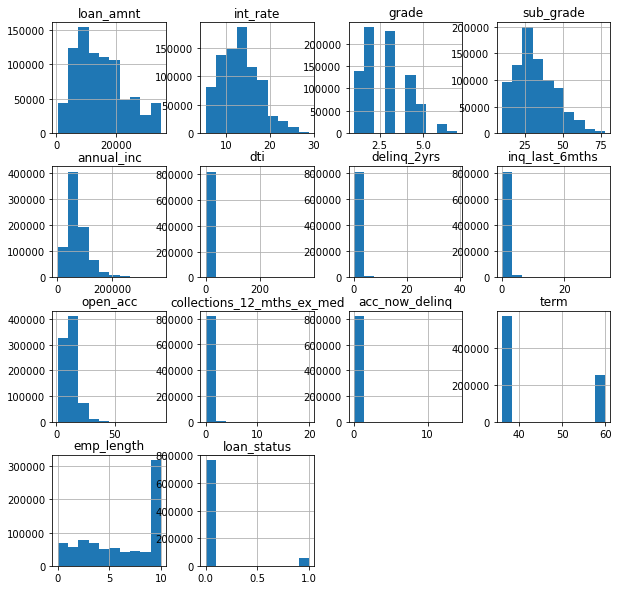

In [118]:
df.hist(figsize=(10,10), bins=10)

# One-hot-encoding Categorical Columns

In [119]:
# df = pd.get_dummies(df, prefix=['term', 'emp', 'home', 'appl', 'purpose'], columns=['term', 'emp_length', 'home_ownership', 'application_type', 'purpose'])
cat_cols = ['home_ownership', 'application_type', 'purpose']
df = pd.get_dummies(df, prefix=['home', 'appl', 'purpose'], columns=cat_cols)

In [120]:
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'term', 'emp_length',
       'loan_status', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'appl_INDIVIDUAL', 'appl_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

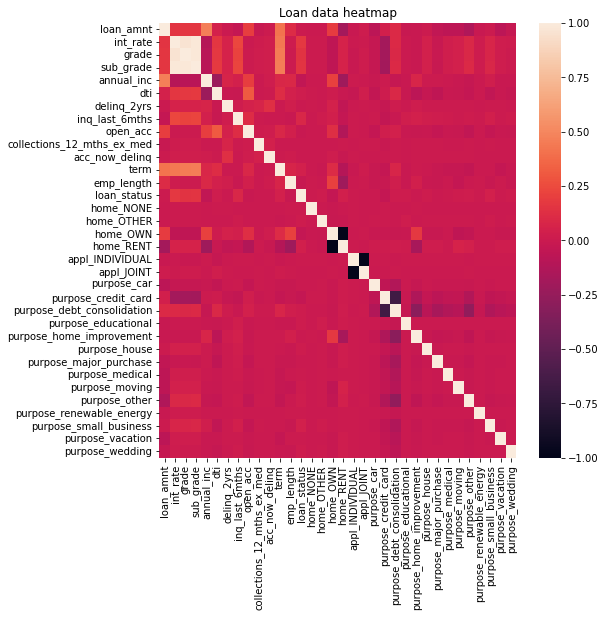

In [121]:
plt.figure(figsize=(8,8))
heat_map = sns.heatmap(df.corr())
plt.title( "Loan data heatmap" )
plt.show()

In [127]:
# Dividing the data into X and y

X = df.drop(['loan_status'], axis=1)
y = df[['loan_status']]

In [128]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standardize the numeric columns using StandardScaler

In [129]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

scaler = StandardScaler()
to_standardize = ['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'term', 'emp_length']

scaler.fit(X_train[to_standardize])
standardized_cols_train = scaler.transform(X_train[to_standardize])
standardized_cols_train = pd.DataFrame(standardized_cols_train)
standardized_cols_train.columns = to_standardize


Index(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'term', 'emp_length',
       'loan_status', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'appl_INDIVIDUAL', 'appl_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [130]:
standardized_cols_train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,658404.0,-1.473256e-16,1.000001,-1.707768,-0.778188,-0.199056,0.608758,2.390701
int_rate,658404.0,7.276851e-16,1.000001,-1.810561,-0.745473,-0.061262,0.670843,3.587862
grade,658404.0,1.987189e-15,1.000001,-1.367034,-0.606370,0.154295,0.914959,3.196952
sub_grade,658404.0,2.567079e-15,1.000001,-1.685288,-0.762413,-0.147162,0.621901,3.544341
annual_inc,658404.0,-6.000994e-17,1.000001,-1.736304,-0.662009,-0.228770,0.368473,7.272592
dti,658404.0,-1.310494e-16,1.000001,-2.190530,-0.746666,-0.058072,0.697199,43.941606
delinq_2yrs,658404.0,5.677682e-15,1.000001,-0.365773,-0.365773,-0.365773,-0.365773,44.821761
inq_last_6mths,658404.0,-6.840983e-16,1.000001,-0.696905,-0.696905,-0.696905,0.304328,32.343777
open_acc,658404.0,9.238274e-16,1.000001,-1.994955,-0.678105,-0.113740,0.450624,14.747857
collections_12_mths_ex_med,658404.0,1.039170e-14,1.000001,-0.106433,-0.106433,-0.106433,-0.106433,149.086322


In [132]:
not_to_standardize = ['home_NONE', 'home_OTHER', 'home_OWN', 
       'home_RENT', 'appl_INDIVIDUAL', 'appl_JOINT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']

X_train = X_train[not_to_standardize]

# Combining the standardized columns and the categorical columns that don't need standardization.

X_train.reset_index(drop=True, inplace=True)
standardized_cols_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([standardized_cols_train, X_train], axis=1) 

In [133]:
X_train.head(3)

,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,collections_12_mths_ex_med,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-0.448528,-0.809332,-0.606370,-0.916225,-1.017129,0.510503,-0.365773,0.304328,-0.678105,-0.106433,...,0,0,0,0,0,0,0,0,0,0
1,-1.113787,0.315054,0.154295,0.160463,-0.730453,-1.390404,0.792882,0.304328,-0.866226,-0.106433,...,0,0,0,0,0,1,0,0,0,0
2,1.796720,-0.289332,-0.606370,-0.300975,1.682406,-0.494505,-0.365773,-0.696905,-1.054348,-0.106433,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Standardizing the test data

standardized_cols_test = scaler.transform(X_test[to_standardize])
standardized_cols_test = pd.DataFrame(standardized_cols_test)
standardized_cols_test.columns = to_standardize
X_test = X_test[not_to_standardize]

# Combining the standardized columns and the categorical columns that don't need standardization.

X_test.reset_index(drop=True, inplace=True)
standardized_cols_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([standardized_cols_test, X_test], axis=1)
X_test.head(3)


,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,collections_12_mths_ex_med,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.608758,-0.129683,-0.606370,-0.300975,-0.348218,-0.061709,-0.365773,0.304328,-0.866226,-0.106433,...,0,0,0,0,0,0,0,0,0,0
1,0.014777,1.049440,0.914959,1.237152,-0.652381,1.317903,-0.365773,-0.696905,0.074381,-0.106433,...,0,0,0,0,0,0,0,0,0,0
2,-0.104019,0.394878,0.154295,0.468088,-0.945460,-0.357513,-0.365773,-0.696905,-0.866226,-0.106433,...,0,0,0,0,0,0,0,0,0,0


In [135]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [136]:
df.to_csv('df_before_split.csv', index=False)